# Ej1

# 1.a

Una red de 2 neuronas con sus conexiones y pesos, donde E es la neurona exitatoria e I la inhibitoria. El peso de E hacia I vale a siendo a > 0, ya que E es exitatoria y el peso de I a E vale -a, debido a que se pedia que ambas tengan el mismo peso pero I es inhibitoria 
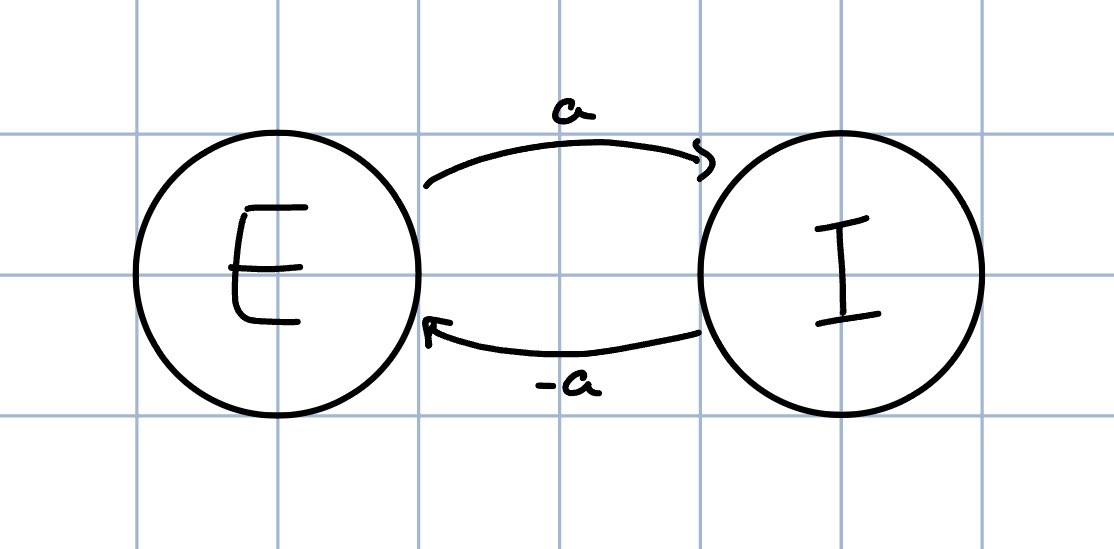

# 1.b
La matriz de pesos es:
\begin{bmatrix}
0 & a \\
-a & 0 \\
\end{bmatrix}

y sus autovalores son

$\lambda_1 = ai$

$\lambda_2 = -ai$

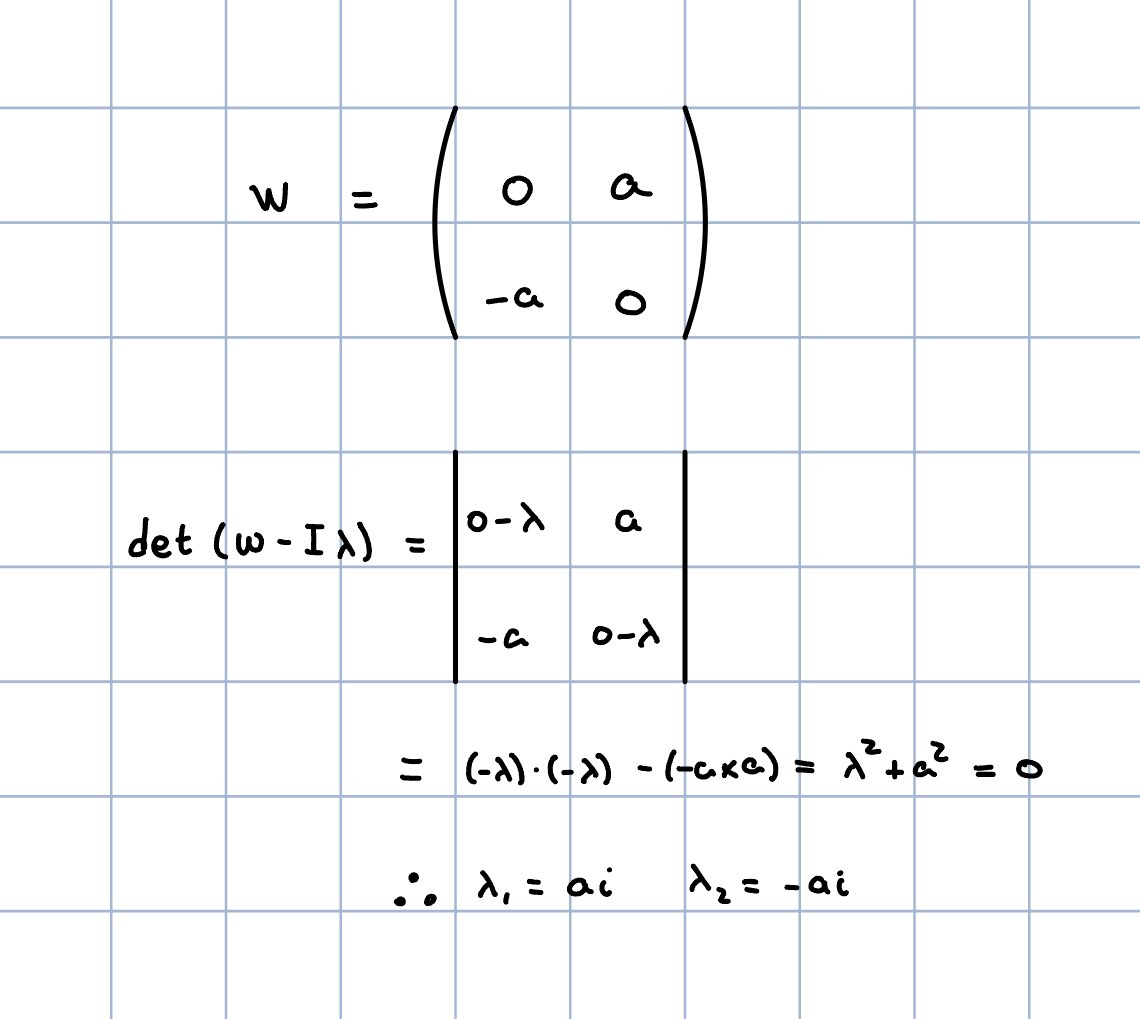


# 1.c
El resultado del sistema es:

$\dot{r}(t) = \frac{e^t}{\tau} \left( \cos(at) + \sin(at), \cos(at) - \sin(at) \right)$

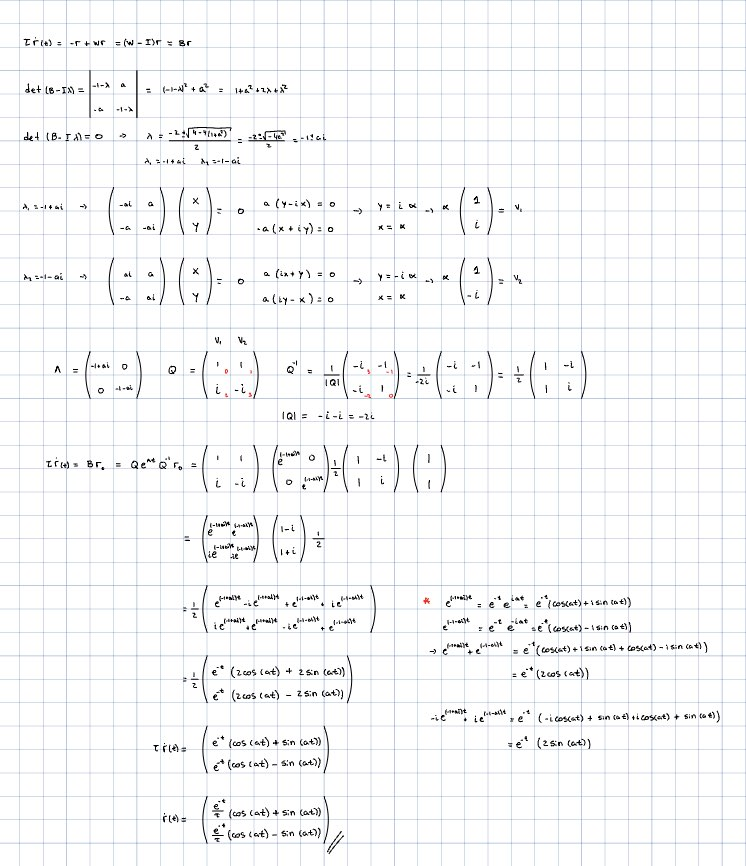

# 1.d

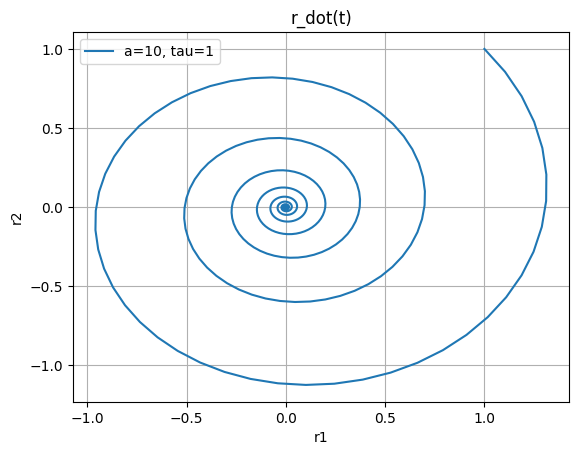

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def n1(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) + np.sin(a*t)))/tau

def n2(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) - np.sin(a*t)))/tau

def r_dot(t, a, tau):
    return (n1(t, a, tau), n2(t, a, tau))

# Plot de r_dot(t)
# t e [0, 2*pi], a=10, tau=1
a = 10
tau = 1
t_values = np.linspace(0, 2*np.pi, 500)
x, y = r_dot(t_values, a, tau)
plt.plot(x, y, label=f'a={a}, tau={tau}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()

# 1.e

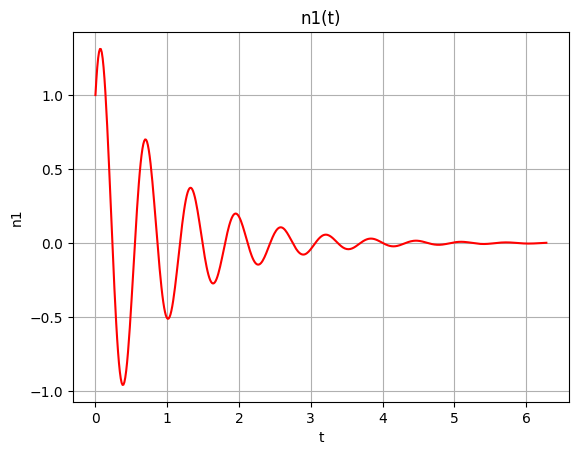

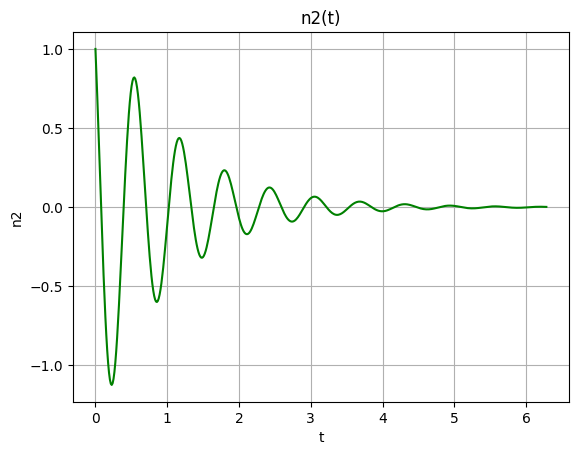

In [2]:
# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1(t_values, a, tau), c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2(t_values, a, tau), c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()


# Ej2

## 2.a
Luego de realizar el despeje queda lo siguiente:

$r_{t+1} = \left(W \triangle t + I \left(1 - \triangle t\right)\right) r_t + h_t$


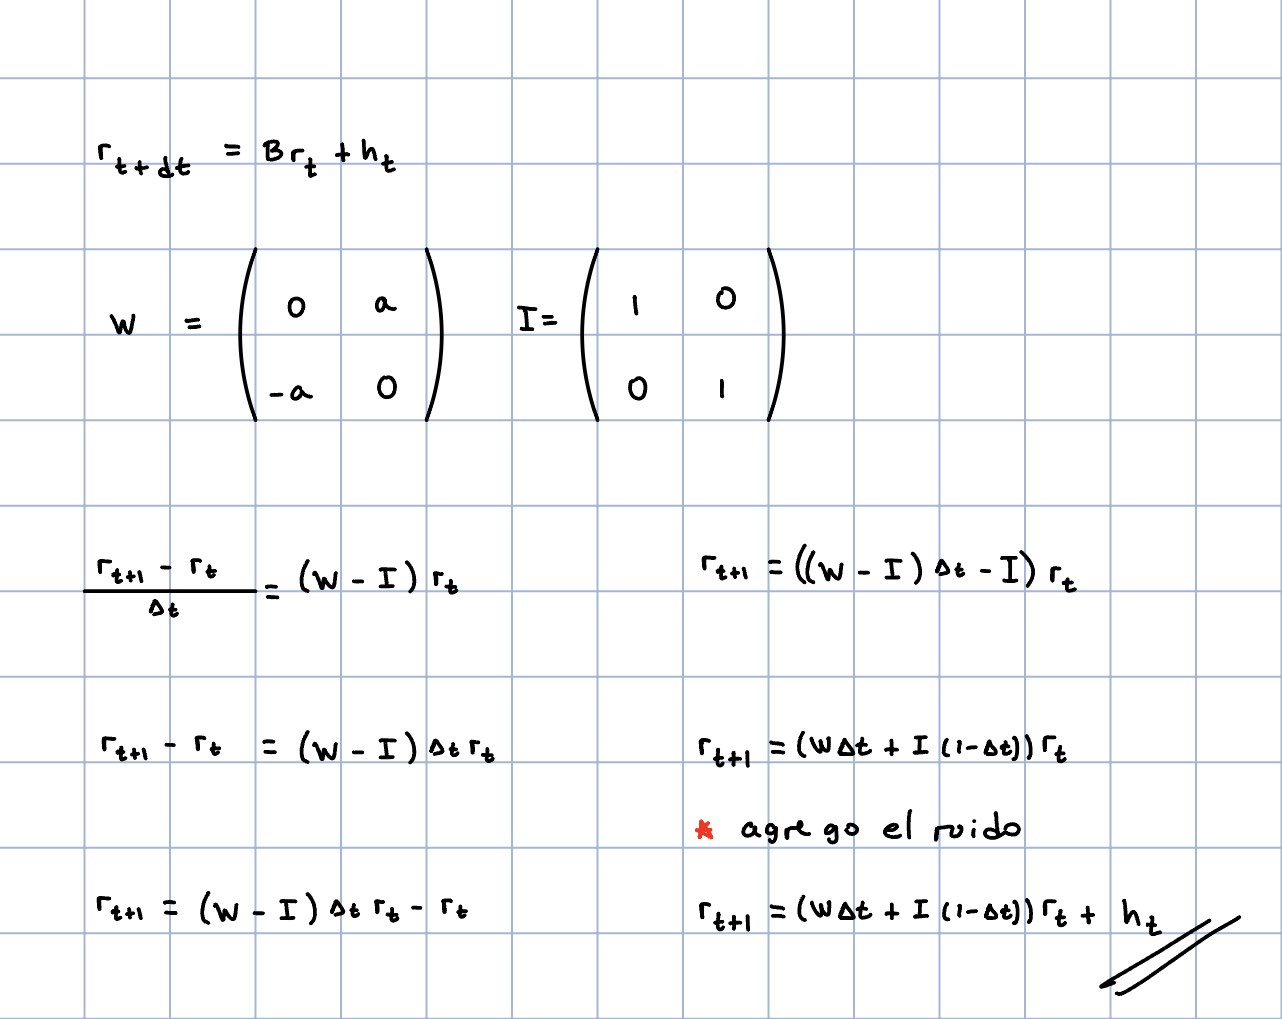

## 2.b
Utilizando las mismas condiciones iniciales que en el ejercicio 1.c, los graficos de n1 vs n2, de n1 vs tiempo y n2 vs tiempo se ven asi:

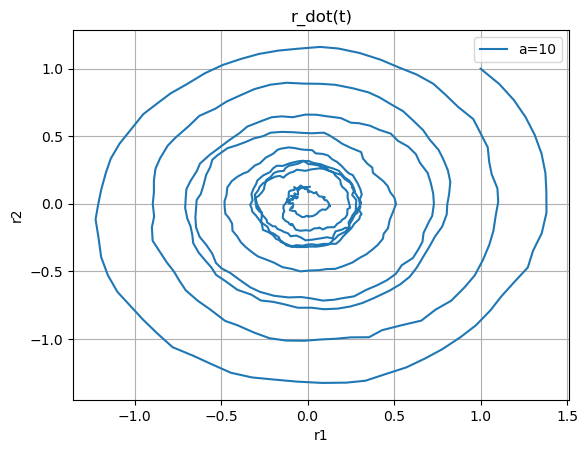

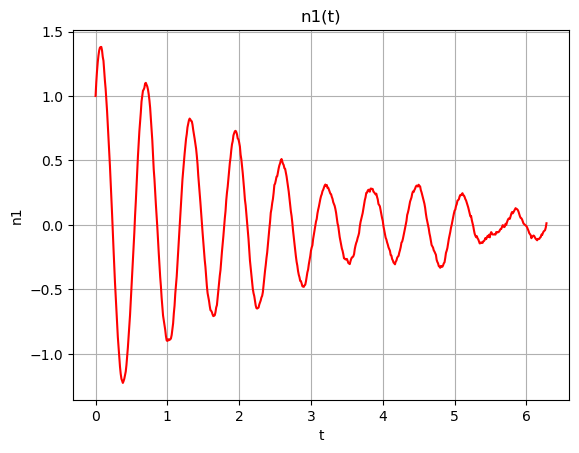

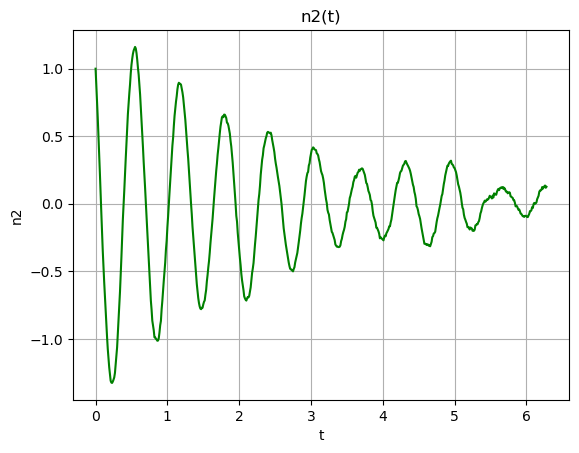

In [17]:
dt = 0.01
t_values = np.arange(0, 2*np.pi, dt)
# t_values x 2 x 1
h = np.random.normal(scale=0.01, size=(t_values.size, 2, 1))
a = 10
# 1 x 2 x 1
r = np.array([[[1], [1]]])
# 2 x 2
w = np.array([[0, a], [-a, 0]])
# 2 x 2
i = np.identity(2)

for index in range(t_values.size):
    # esto me devuelve 2 x 1
    next_r = ((i*(1-dt) + dt*w) @ r[index])
    # le agrego el ruido
    next_r = next_r + h[index]
    # para poder concatenarlo necesito 1 x 2 x 1 -> hago reshape
    next_r = np.reshape(next_r, (1, 2, 1))
    r = np.concatenate((r, next_r), axis=0)

# aca me sobra 1 elemento (pq tengo el r_0 + t_values elementos, elimino el ultimo)
n1 = np.resize(r[:, 0], t_values.size)
n2 = np.resize(r[:, 1], t_values.size)

plt.plot(n1, n2, label=f'a={a}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()


# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1, c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2, c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()
